In [6]:
import csv

pt=[]
with open('accelergy/data/primitives_table.csv', newline='') as csvfile:
    rd = csv.reader(csvfile) #delimiter=' '
    for row in rd:
        pt.append(row)

In [40]:
pt

[['name',
  'io_pad_internal_power',
  'io_pad_switching_power',
  'io_pad_leakage_power',
  'io_pad_total_power',
  'memory_internal_power',
  'memory_switching_power',
  'memory_leakage_power',
  'memory_total_power',
  'black_box_internal_power',
  'black_box_switching_power',
  'black_box_leakage_power',
  'black_box_total_power',
  'clock_network_internal_power',
  'clock_network_switching_power',
  'clock_network_leakage_power',
  'clock_network_total_power',
  'register_internal_power',
  'register_switching_power',
  'register_leakage_power',
  'register_total_power',
  'sequential_internal_power',
  'sequential_switching_power',
  'sequential_leakage_power',
  'sequential_total_power',
  'combinational_internal_power',
  'combinational_switching_power',
  'combinational_leakage_power',
  'combinational_total_power',
  'dyn_power_unit',
  'leak_power_unit',
  'Combinational_Area',
  'Noncombinational_Area',
  'Buf/Inv_Area',
  'Total_Buffer_Area',
  'Total_Inverter_Area',
  'Ma

In [52]:
delay_column='critical_path_clock_latency'
delay_idx=pt[0].index(delay_column)
slack_column='critical_path_slack'
slack_idx=pt[0].index(slack_column)
area_columns=['Combinational_Area','Noncombinational_Area','Buf/Inv_Area']
area_idx=[]
for area_col in area_columns:
    area_idx.append(pt[0].index(area_col))
    
power_columns=[]
for col in pt[0]:
    if ('power' in col) and ('unit' not in col):
        power_columns.append(col)
power_idx=[]
for power_col in power_columns:
    power_idx.append(pt[0].index(power_col))

print(slack_column)
print(slack_idx)
print(power_columns)
print(power_idx)
print(delay_column)
print(delay_idx)
print(area_columns)
print(area_idx)

critical_path_slack
41
['io_pad_internal_power', 'io_pad_switching_power', 'io_pad_leakage_power', 'io_pad_total_power', 'memory_internal_power', 'memory_switching_power', 'memory_leakage_power', 'memory_total_power', 'black_box_internal_power', 'black_box_switching_power', 'black_box_leakage_power', 'black_box_total_power', 'clock_network_internal_power', 'clock_network_switching_power', 'clock_network_leakage_power', 'clock_network_total_power', 'register_internal_power', 'register_switching_power', 'register_leakage_power', 'register_total_power', 'sequential_internal_power', 'sequential_switching_power', 'sequential_leakage_power', 'sequential_total_power', 'combinational_internal_power', 'combinational_switching_power', 'combinational_leakage_power', 'combinational_total_power']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
critical_path_clock_latency
42
['Combinational_Area', 'Noncombinational_Area', 'Buf/Inv_Area']
[31, 3

In [75]:
delay={}

slack={2:[],4:[],8:[],16:[],32:[],64:[],128:[]}
area={2:[],4:[],8:[],16:[],32:[],64:[],128:[]}
power={2:[],4:[],8:[],16:[],32:[],64:[],128:[]}

#area={1:[],8:[],16:[],32:[],64:[]}
#power={1:[],8:[],16:[],32:[],64:[]}

#component_name='RegisteredMultiplier'
#split_letter='h'

#component_name='ParallelKoggeStonePrefixSumRegistered'
#split_letter='h'

component_name='ParallelDec2PriorityEncoderRegistered'
split_letter='s'

for row in pt:
    if component_name in row[0]:
        #print(row[0])
        #print(row[delay_idx])
        
        nm=row[0]
        bitwidth=int(nm.split("_")[1].split(".")[0].split(split_letter)[1])
        #print(bitwidth)
        
        area_total=0.0
        power_total=0.0
        
        for adx in area_idx:
            area_total += float(row[adx])
            
        for pdx in power_idx:
            power_total += float(row[pdx])
            
        #print(area_total)
            
        delay[float(row[delay_idx])]=0
        slack[bitwidth].append(float(row[slack_idx]))
        area[bitwidth].append(area_total)
        power[bitwidth].append(power_total)

delay_keys=list(delay.keys())
        
#print(delay_keys)        
#print(area)

Text(0.5, 1.0, 'Area semilogy')

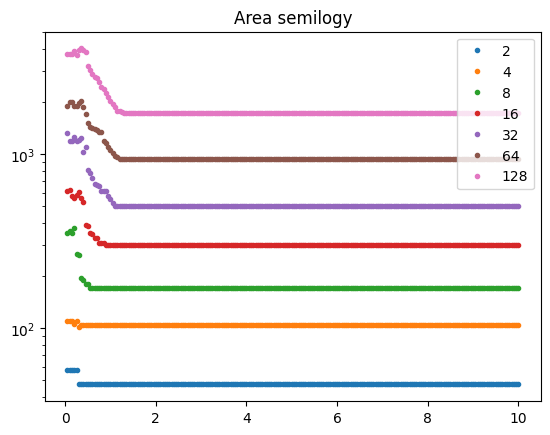

In [76]:
import matplotlib.pyplot as plt

leg_list=[]

for bitwidth in area:
    plt.semilogy(delay_keys,area[bitwidth],'.')
    leg_list.append(str(bitwidth))

plt.legend(leg_list)
plt.title("Area semilogy")

Text(0.5, 1.0, 'Power semilogy')

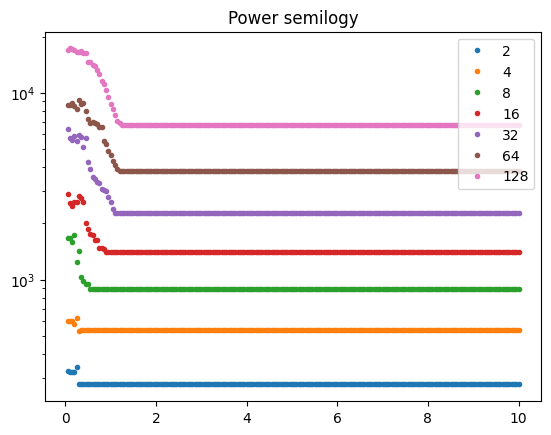

In [77]:
leg_list=[]

for bitwidth in area:
    plt.semilogy(delay_keys,power[bitwidth],'.')
    leg_list.append(str(bitwidth))

plt.legend(leg_list)
plt.title("Power semilogy")

Text(0.5, 1.0, 'Area linear plot')

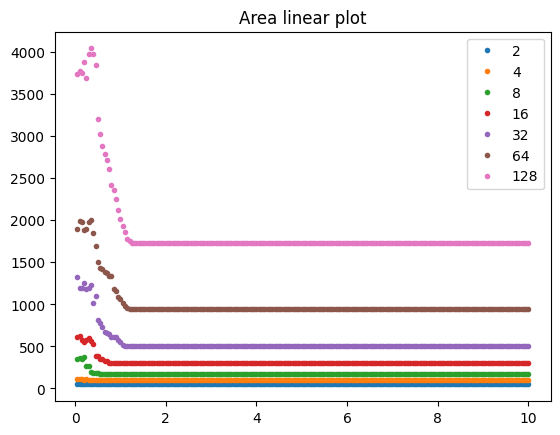

In [78]:
import matplotlib.pyplot as plt

leg_list=[]

for bitwidth in area:
    plt.plot(delay_keys,area[bitwidth],'.')
    leg_list.append(str(bitwidth))

plt.legend(leg_list)
plt.title("Area linear plot")

Text(0.5, 1.0, 'Power linear plot')

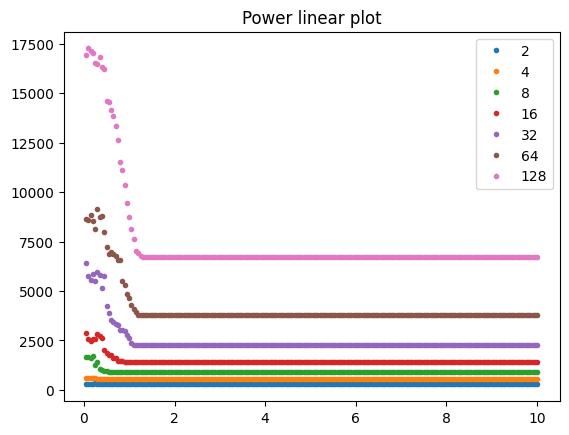

In [79]:
leg_list=[]

for bitwidth in area:
    plt.plot(delay_keys,power[bitwidth],'.')
    leg_list.append(str(bitwidth))

plt.legend(leg_list)
plt.title("Power linear plot")

Text(0.5, 1.0, 'Slack linear plot')

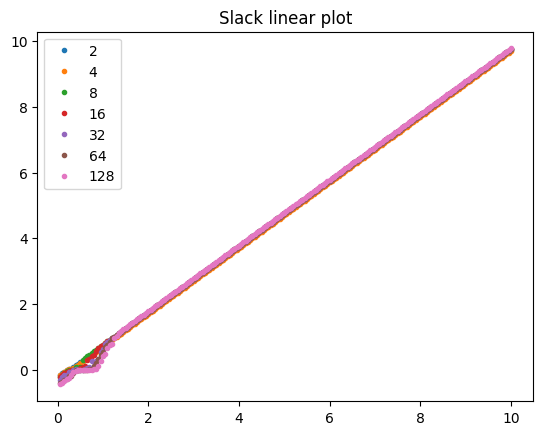

In [80]:
leg_list=[]

for bitwidth in area:
    plt.plot(delay_keys,slack[bitwidth],'.')
    leg_list.append(str(bitwidth))

plt.legend(leg_list)
plt.title("Slack linear plot")

In [81]:
def get_non_negative_slack_subset(slack_,area_,power_,delay_):
    valid_idx_=[]
    area_valid_=[]
    power_valid_=[]
    delay_valid_=[]
    slack_valid_=[]
    for sdx in range(len(slack_)):
        if slack_[sdx]>=0.0:
            valid_idx_.append(sdx)
            area_valid_.append(area_[sdx])
            power_valid_.append(power_[sdx])
            delay_valid_.append(delay_[sdx])
            slack_valid_.append(slack_[sdx])
            
    return valid_idx_,area_valid_,power_valid_,delay_valid_,slack_valid_

Text(0.5, 1.0, 'Area linear plot')

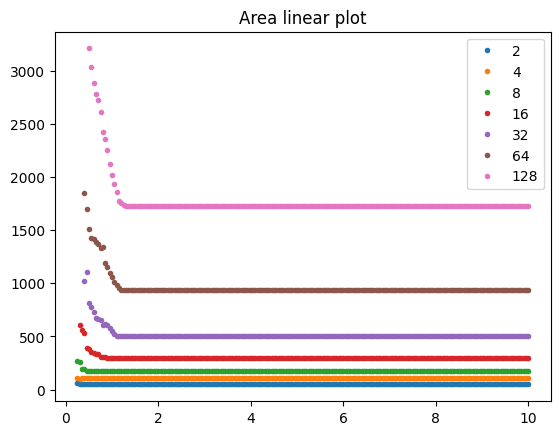

In [82]:
import matplotlib.pyplot as plt

leg_list=[]

for bitwidth in area:
    
    valid_idx,area_valid,power_valid,delay_valid,slack_valid=get_non_negative_slack_subset(slack[bitwidth],area[bitwidth],power[bitwidth],delay_keys)
    
    plt.plot(delay_valid,area_valid,'.')
    leg_list.append(str(bitwidth))

plt.legend(leg_list)
plt.title("Area linear plot")

Text(0.5, 1.0, 'Power linear plot')

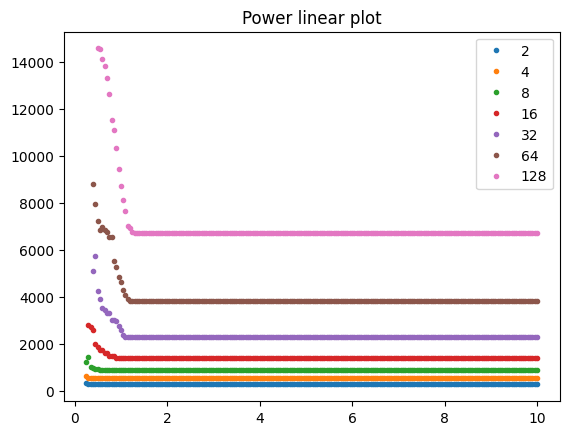

In [83]:
leg_list=[]

for bitwidth in area:
    
    valid_idx,area_valid,power_valid,delay_valid,slack_valid=get_non_negative_slack_subset(slack[bitwidth],area[bitwidth],power[bitwidth],delay_keys)
    
    plt.plot(delay_valid,power_valid,'.')
    leg_list.append(str(bitwidth))

plt.legend(leg_list)
plt.title("Power linear plot")

Text(0.5, 1.0, 'Power,area bounded Pareto curve')

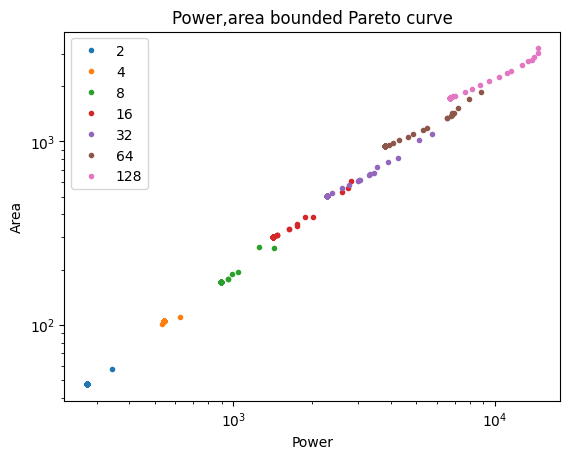

In [84]:
import matplotlib.pyplot as plt

leg_list=[]

for bitwidth in area:
    
    valid_idx,area_valid,power_valid,delay_valid,slack_valid=get_non_negative_slack_subset(slack[bitwidth],area[bitwidth],power[bitwidth],delay_keys)
    
    plt.loglog(power_valid,area_valid,'.')
    leg_list.append(str(bitwidth))

plt.xlabel('Power')
plt.ylabel('Area')
plt.legend(leg_list)
plt.title("Power,area bounded Pareto curve")